<a href="https://colab.research.google.com/github/GermanOmar/LAFW/blob/master/LAFW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning regressors for UTS prediction in laser-assisted rotary friction welding


<a href="https://ibb.co/h2Prbq5"><img src="https://i.ibb.co/2cDRxb2/Imagen1.png" WIDTH="329" HEIGHT="713"  border="0"></a>

In [2]:
pip install lazypredict

     |████████████████████████████████| 81kB 7.4MB/s 
     |████████████████████████████████| 307kB 22.7MB/s 
     |████████████████████████████████| 256kB 50.9MB/s 
     |████████████████████████████████| 25.9MB 122kB/s 
     |████████████████████████████████| 127.6MB 98kB/s 
     |████████████████████████████████| 6.8MB 51.1MB/s 
     |████████████████████████████████| 14.5MB 212kB/s 
     |████████████████████████████████| 276kB 53.9MB/s 
     |████████████████████████████████| 10.1MB 17.0MB/s 
     |████████████████████████████████| 1.2MB 50.8MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44620 sha256=4b02516f58afe05c18f5dd9854c88df26e362c55bc2a318ed551cf3f0adeedd2
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.19.1 which is incompatible.
ERROR: google-colab 1.0.0 has requiremen

 Libraries

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

 Upload database:

In [5]:
!git clone https://github.com/GermanOmar/LAFW

Cloning into 'LAFW'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [6]:
#Experimental data
data = pd.read_table('data.txt') 
data.describe()


,N,FP,LP,UTS
count,48.00,48.00,48.00,48.00
mean,1700.00,17.50,600.00,148.13
std,101.06,3.54,378.13,40.69
min,1600.00,14.00,0.00,60.30
25%,1600.00,14.00,450.00,114.30
50%,1700.00,17.50,700.00,149.75
75%,1800.00,21.00,850.00,176.82
max,1800.00,21.00,1000.00,215.40



Setting inputs - output:

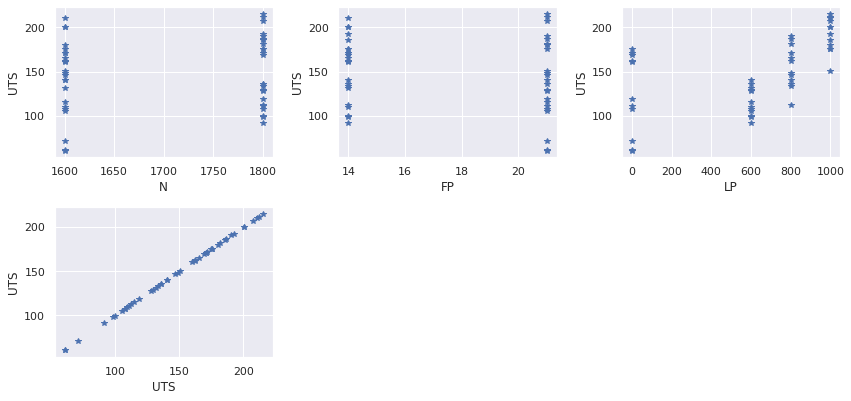

In [12]:
fields = [ 'N', 'FP','LP', 'UTS']
import seaborn as sns
sns.set()

fig = plt.figure()
fig.set_size_inches((12,8))
for i, field in enumerate(fields):
  plt.subplot(3, 3, i + 1)
  plt.plot(data[field], data['UTS'], 'b*')
  plt.xlabel(field)
  plt.ylabel('UTS')

plt.tight_layout()

X=data[[ 'N', 'FP','LP']]
Y=data['UTS'][:,None]



#fig.tight_layout()

In [9]:
from pandas.plotting import scatter_matrix
#DISPLAY MATRIX - identificar correlacion entre variables
scatter_matrix(data, alpha=0.8, marker='o', figsize = (12,12))
import warnings
warnings.filterwarnings("ignore")

AttributeError: ignored

#UTS prediction

In [13]:
def normalize(X, X_mu, X_std):
  return (X - X_mu)/X_std

def denormalize(Xn, X_mu, X_std):
  return Xn*X_std + X_mu

X_std = X.std(0)
X_mu = X.mean(0)
Xn = normalize(X, X_mu, X_std)

Y_std = Y.std(0)
Y_mu = Y.mean(0)
Yn = normalize(Y, Y_mu, Y_std)

ImportError: ignored

 Split data

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print('training samples:', X_train.shape[0],  ' test samples:', X_test.shape[0])

training samples: 38  test samples: 10


#Results:

In [36]:
from sklearn.metrics import mean_absolute_error as MAE
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [00:01<00:00, 29.06it/s]

                               Adjusted R-Squared  R-Squared   RMSE  Time Taken
Model                                                                          
ExtraTreesRegressor                          0.96       0.98   7.93        0.11
ExtraTreeRegressor                           0.96       0.98   7.93        0.02
DecisionTreeRegressor                        0.96       0.98   7.93        0.01
GaussianProcessRegressor                     0.96       0.98   7.93        0.02
XGBRegressor                                 0.96       0.98   7.93        0.02
GradientBoostingRegressor                    0.94       0.96  10.11        0.07
RandomForestRegressor                        0.87       0.91  15.13        0.16
AdaBoostRegressor                            0.86       0.91  15.66        0.10
BaggingRegressor                             0.84       0.90  16.58        0.03
KNeighborsRegressor                          0.37       0.58  33.22        0.02
HuberRegressor                          

In [37]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.96,0.98,7.93,0.11
ExtraTreeRegressor,0.96,0.98,7.93,0.02
DecisionTreeRegressor,0.96,0.98,7.93,0.01
GaussianProcessRegressor,0.96,0.98,7.93,0.02
XGBRegressor,0.96,0.98,7.93,0.02
GradientBoostingRegressor,0.94,0.96,10.11,0.07
RandomForestRegressor,0.87,0.91,15.13,0.16
AdaBoostRegressor,0.86,0.91,15.66,0.10
BaggingRegressor,0.84,0.90,16.58,0.03


###GBR 

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
#KERNEL
#GBR=GradientBoostingRegressor(n_estimators=100, random_state=0)
GBR=GradientBoostingRegressor(n_estimators=5000, random_state=32, learning_rate=0.1 )

#START TRAINING
GBR.fit(X_train,y_train)
#PREDICTION
y_pred=GBR.predict(X_test)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

 
print("-Gradient boosting regressor-")
print("-----------------------------")

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()


-Gradient boosting regressor-
-----------------------------
MSE test: 62.8568703869844

R2:  0.9760458527967671
RMSE:  7.9282324882021715
MAE:  7.355511466699556
IM:  10.814850582643354



### GPs

In [39]:
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
 
GP=GPR(kernel=kernel, n_restarts_optimizer=9, alpha=0.01, normalize_y=True)
 
#Training
GP.fit(X_train,y_train)
 
#Testing
y_star_train = GP.predict(X_train)
y_pred = GP.predict(X_test)
 
from sklearn.metrics import mean_squared_error
MSE_test = mean_squared_error(y_test, y_pred)
MSE_train = mean_squared_error(y_train, y_star_train)
 
print("Gaussian Process")
print('MSE train:', MSE_train)
print('MSE test:', MSE_test)
print("MSE train < MSE test?", MSE_train < MSE_test)
print()
from sklearn.metrics import r2_score
R2_train=r2_score(y_train, y_star_train)
print('R2_train: ',R2_train)
R2_test=r2_score(y_test, y_pred)
print('R2_test: ',R2_test)
print()
""" 
RE=100 * abs(y_test - y_pred) / y_test
print('Relative error (%): ',RE)
"""
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 
#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

Gaussian Process
MSE train: 43.56897693011767
MSE test: 65.60237917277664
MSE train < MSE test? True

R2_train:  0.9676579628028734
R2_test:  0.9749995658722393

R2:  0.9749995658722393
RMSE:  8.0995295649054
MAE:  7.507212522561758
IM:  11.043606478564477



### RFR

In [40]:
from sklearn.ensemble import RandomForestRegressor
#KERNEL
RFR=RandomForestRegressor(n_estimators=1000,max_depth=20)

#START TRAINING
RFR.fit(X_train,y_train)
#PREDICTION
y_pred=RFR.predict(X_test)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

print("-----------------------------")

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

-----------------------------
MSE test: 222.602134349397

R2:  0.9151684730542452
RMSE:  14.919857048557704
MAE:  10.885159986508338
IM:  18.468785522314217



### XGB

In [41]:
import pickle
import xgboost as xgb

xgbr = xgb.XGBRegressor(verbosity=0, n_estimators=1000, max_depth=8)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

In [42]:
print(xgbr)



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)


In [43]:
score = xgbr.score(X_test, y_test)  
print("Training score: ", score)

Training score:  0.9760407386444981


In [44]:
print("-XGBRegressor -")
print("------------------")

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

-XGBRegressor -
------------------
MSE test: 62.870290176200214

R2:  0.9760407386444981
RMSE:  7.929078772228222
MAE:  7.356287536621093
IM:  10.815998823217935



### MLP

In [45]:
from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(hidden_layer_sizes=4,solver='lbfgs',learning_rate='adaptive',activation='relu',random_state=42, max_iter=2000)
#MLP = MLPRegressor(hidden_layer_sizes=(1000,1000,1000), activation='relu', solver='adam', max_iter=800)

#START TRAINING
MLP.fit(X_train,y_train)
#PREDICTION
y_pred=MLP.predict(X_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()



R2:  0.6341583961662984
RMSE:  7.929078772228222
MAE:  24.801313460429615
IM:  26.040531477252593



### DTR

In [46]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor(max_depth=20)

#START TRAINING
DT.fit(X_train,y_train)
#PREDICTION
y_pred=DT.predict(X_test)
print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()



R2:  0.9760461263765746
RMSE:  7.929078772228222
MAE:  7.355500000000001
IM:  10.815463199246798



# Comparisson

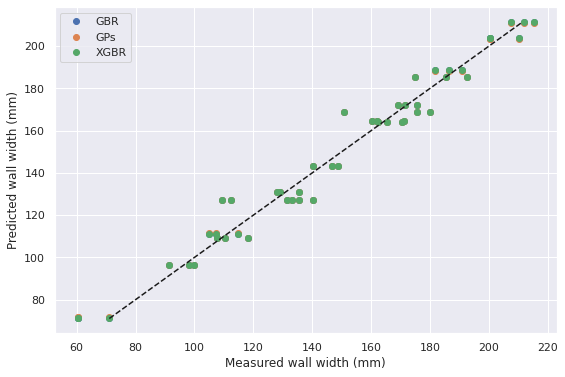

In [47]:
models = [ GBR ,  GP, xgbr]
labels = ['GBR', 'GPs', 'XGBR']

fig = plt.figure()
fig.set_size_inches((9,6))

for mod, label in zip( models, labels): 
  y_pred = mod.predict(X)
  plt.plot(Y, y_pred, 'o' ,label = label)

plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--')
plt.ylabel('Predicted wall width (mm)')
plt.xlabel('Measured wall width (mm)')
plt.legend()  
  

Worst

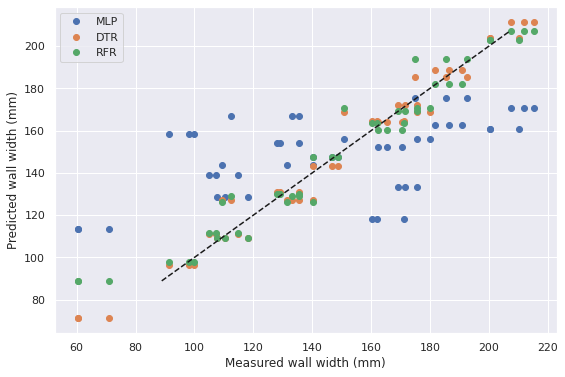

In [48]:
models = [ MLP, DT, RFR  ]
labels = [ 'MLP', 'DTR', 'RFR']

fig = plt.figure()
fig.set_size_inches((9,6))

for mod, label in zip( models, labels): 
  y_pred = mod.predict(X)
  plt.plot(Y, y_pred, 'o' ,label = label)

plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--')
plt.ylabel('Predicted wall width (mm)')
plt.xlabel('Measured wall width (mm)')
plt.legend()  

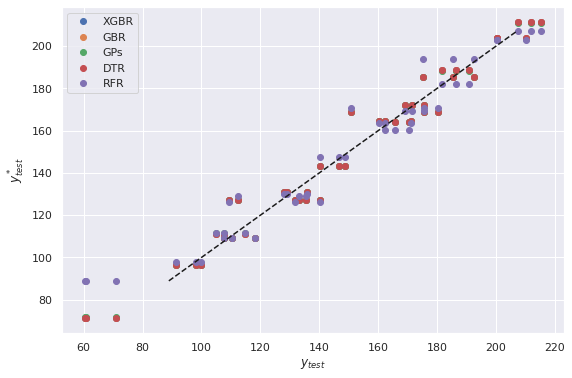

In [49]:
models = [xgbr,  GBR,  GP, DT,  RFR ]
labels = ['XGBR',  'GBR',   'GPs', 'DTR',  'RFR']

fig = plt.figure()
fig.set_size_inches((9,6))

for mod, label in zip( models, labels): 
  y_pred = mod.predict(X)
  plt.plot(Y, y_pred, 'o' ,label = label)

plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--')
plt.ylabel('$y^*_{test}$')
plt.xlabel('$y_{test}$')
plt.legend()

# CROSS-VALIDATION

In [50]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import cross_val_score as CV

import warnings
warnings.filterwarnings('ignore')

models = [xgbr,  GBR,  GP, DT, MLP, RFR ]
labels = ['XGBR',  'GBR',   'GPs', 'DTR', 'MLP', 'RFR']
IMS = []

print("--------------------------------------------------------------")
print("%5s | %5s | %5s | %5s | %5s " % ("ML algorithm",  "CV-R2", "CV-MSE", "CV-MAE", "IM"))
print("--------------------------------------------------------------")

for mod, label in zip( models, labels): 
  y_star_train = mod.predict(X_train)
 
  scoreR2 = CV(mod, X_train, y_train, cv=5, scoring='r2')
  #print(-1*scoreR2)
  scoreMSE = CV(mod, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  #print(-1*scoreMSE)
  scoreMAE = CV(mod, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
  #print(-1*scoreMAE)
  IM=np.sqrt(((1-scoreR2)**2) + (scoreMSE) + (scoreMAE**2) )
  #print("IM: ", IM)
  
 
  print("%15s | %.4f | %.4f | %.4f | %.4f " % (label,  scoreR2.mean(), -1*scoreMSE.mean(), -1*scoreMAE.mean() , np.sqrt(((1-scoreR2.mean())**2) + (-1*scoreMSE.mean()) + (scoreMAE.mean()**2) )))
print("--------------------------------------------------------------")

--------------------------------------------------------------
ML algorithm | CV-R2 | CV-MSE | CV-MAE |    IM 
--------------------------------------------------------------
           XGBR | 0.8440 | 195.2499 | 10.3100 | 17.3658 
            GBR | 0.9073 | 113.6947 | 8.3484 | 13.5425 
            GPs | 0.7389 | 325.5424 | 10.8425 | 21.0516 
            DTR | 0.7731 | 284.9736 | 11.7279 | 20.5565 
            MLP | -0.2878 | 1554.7296 | 33.6693 | 51.8653 
            RFR | 0.7600 | 309.1446 | 12.4265 | 21.5319 
--------------------------------------------------------------
